# Github Repo Classification


In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sbn
import sklearn

import sys
import os

from main import normalize_data
from metrics.githubMetrics import GithubMetrics, metricCollection
from importer.datasetImporter import DatasetImporter

## Data Aggregation

In [2]:
importer = DatasetImporter('data/testset.csv')
X_unnorm = importer.data
y = importer.target
X = normalize_data(X_unnorm)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

X[:5]

,pdf_count,is_io_page,is_link_in_description,open_issue_count,up_to_dateness,watcher_count,md_count,avg_entropy,file_folder_ratio,html_count,...,file_count,forks_count,avg_folder_depth,repo_size,doc_in_description_or_title,hw_in_description_or_title,intro_or_course_in_description_or_title,png_count,hw_terminology_commits,edu_mail_ratio
0,0.0,0.0,0.0,0.636525,0.000007,0.772285,0.187607,0.614573,0.358461,0.0000,...,0.536725,0.568103,0.260950,0.754886,0.0,0.0,0.0,0.007822,0.666178,0.005291
1,0.0,0.0,0.0,0.151461,0.044852,0.752412,0.230062,0.602981,0.203083,0.0000,...,0.287825,0.534387,0.201288,0.369765,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.000000,0.016688,0.000000,0.290305,0.701683,0.297784,0.0422,...,0.599871,0.000000,0.289988,0.734424,0.0,0.0,0.0,0.113809,0.377760,0.011194
3,0.0,0.0,0.0,0.000000,0.009113,0.000000,0.415712,0.605136,0.228334,0.0000,...,0.487819,0.000000,0.793583,0.373364,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,0.000000,0.252144,0.000000,0.217729,0.618334,0.263303,0.0000,...,0.491944,0.000000,0.588078,0.508358,0.0,0.0,0.0,0.074129,0.084710,0.024390


In [3]:
X_unnorm[:5]

,pdf_count,is_io_page,is_link_in_description,open_issue_count,up_to_dateness,watcher_count,md_count,avg_entropy,file_folder_ratio,html_count,...,file_count,forks_count,avg_folder_depth,repo_size,doc_in_description_or_title,hw_in_description_or_title,intro_or_course_in_description_or_title,png_count,hw_terminology_commits,edu_mail_ratio
0,0.0,0,0,338,5.759386e+03,4782,5.0,0.607390,12.306122,0.000000,...,603,645,1.971429,80544,0,0,0,0.004975,232,0.005291
1,0.0,0,0,3,1.129125e+07,3845,8.0,0.595933,3.333333,0.000000,...,30,439,1.714286,252,0,0,0,0.000000,0,0.000000
2,0.0,0,0,0,4.203658e+06,0,15.0,0.693482,7.585799,0.025741,...,1282,0,2.105263,59299,0,0,0,0.074883,21,0.011194
3,0.0,0,0,0,2.297344e+06,0,52.0,0.598064,4.200000,0.000000,...,336,0,5.666667,266,0,0,0,0.000000,0,0.000000
4,0.0,0,0,0,6.345745e+07,0,7.0,0.611107,5.693548,0.000000,...,353,0,3.880952,2012,0,0,0,0.048159,1,0.024390


In [4]:
# X_std = np.log(X_unnorm + 1.0)

# minmax_scaler = sklearn.preprocessing.MinMaxScaler().fit(X_std)
# X_std = minmax_scaler.transform(X_std)
# std_scaler = sklearn.preprocessing.StandardScaler().fit(X_std)
# X_std = std_scaler.transform(X_std)

# robust_scaler = sklearn.preprocessing.RobustScaler().fit()
# X_std = robust_scaler.transform(X_std)

# X_std = pd.DataFrame(X_std, columns=X.columns)
# X_std[:5]

## Visualizations

we want to compare stuff

In [15]:
metric_list = list(metricCollection.keys())
metric_list

['pdf_count',
 'is_io_page',
 'is_link_in_description',
 'open_issue_count',
 'up_to_dateness',
 'watcher_count',
 'md_count',
 'avg_entropy',
 'file_folder_ratio',
 'html_count',
 'doc_terms_in_readme',
 'hw_terminology_file_or_dir_names',
 'source_code_file_ratio',
 'file_count',
 'forks_count',
 'avg_folder_depth',
 'repo_size',
 'doc_in_description_or_title',
 'hw_in_description_or_title',
 'intro_or_course_in_description_or_title',
 'png_count',
 'hw_terminology_commits',
 'edu_mail_ratio']

In [36]:
def dump_boxplots(data, y_data):
    for metric in metric_list:
        data_per_metric = data[metric]
        fig = plt.figure(figsize=(8, 3.3))
        ax = fig.add_subplot(111)
        
        classes = np.unique(y_data)
        data_per_class = []
        for cls in classes:
            data_per_class.append(data_per_metric[y_data == cls])
        
        plt.boxplot(data_per_class, labels=classes)
        ax.set_title(metric)
        ax.set_ylim([-0.2, 1.2])
        fig.savefig('{:s}.png'.format(metric), dpi=300)

#dump_boxplots(X, y)

In [13]:
def boxplots(data, y_data):
    h = math.ceil(len(metric_list) / 2)
    fig, axes = plt.subplots(nrows=h, ncols=2, figsize=(16, 40))
    for i, metric in enumerate(metric_list):
        x = i % 2
        y = int(i / 2)
        data_per_metric = data[metric]
        
        classes = np.unique(y_data)
        data_per_class = []
        for cls in classes:
            data_per_class.append(data_per_metric[y_data == cls])
        
        axes[y, x].boxplot(data_per_class, labels=classes)
        axes[y, x].set_title(metric)
        axes[y, x].set_ylim([-0.2, 1.2])

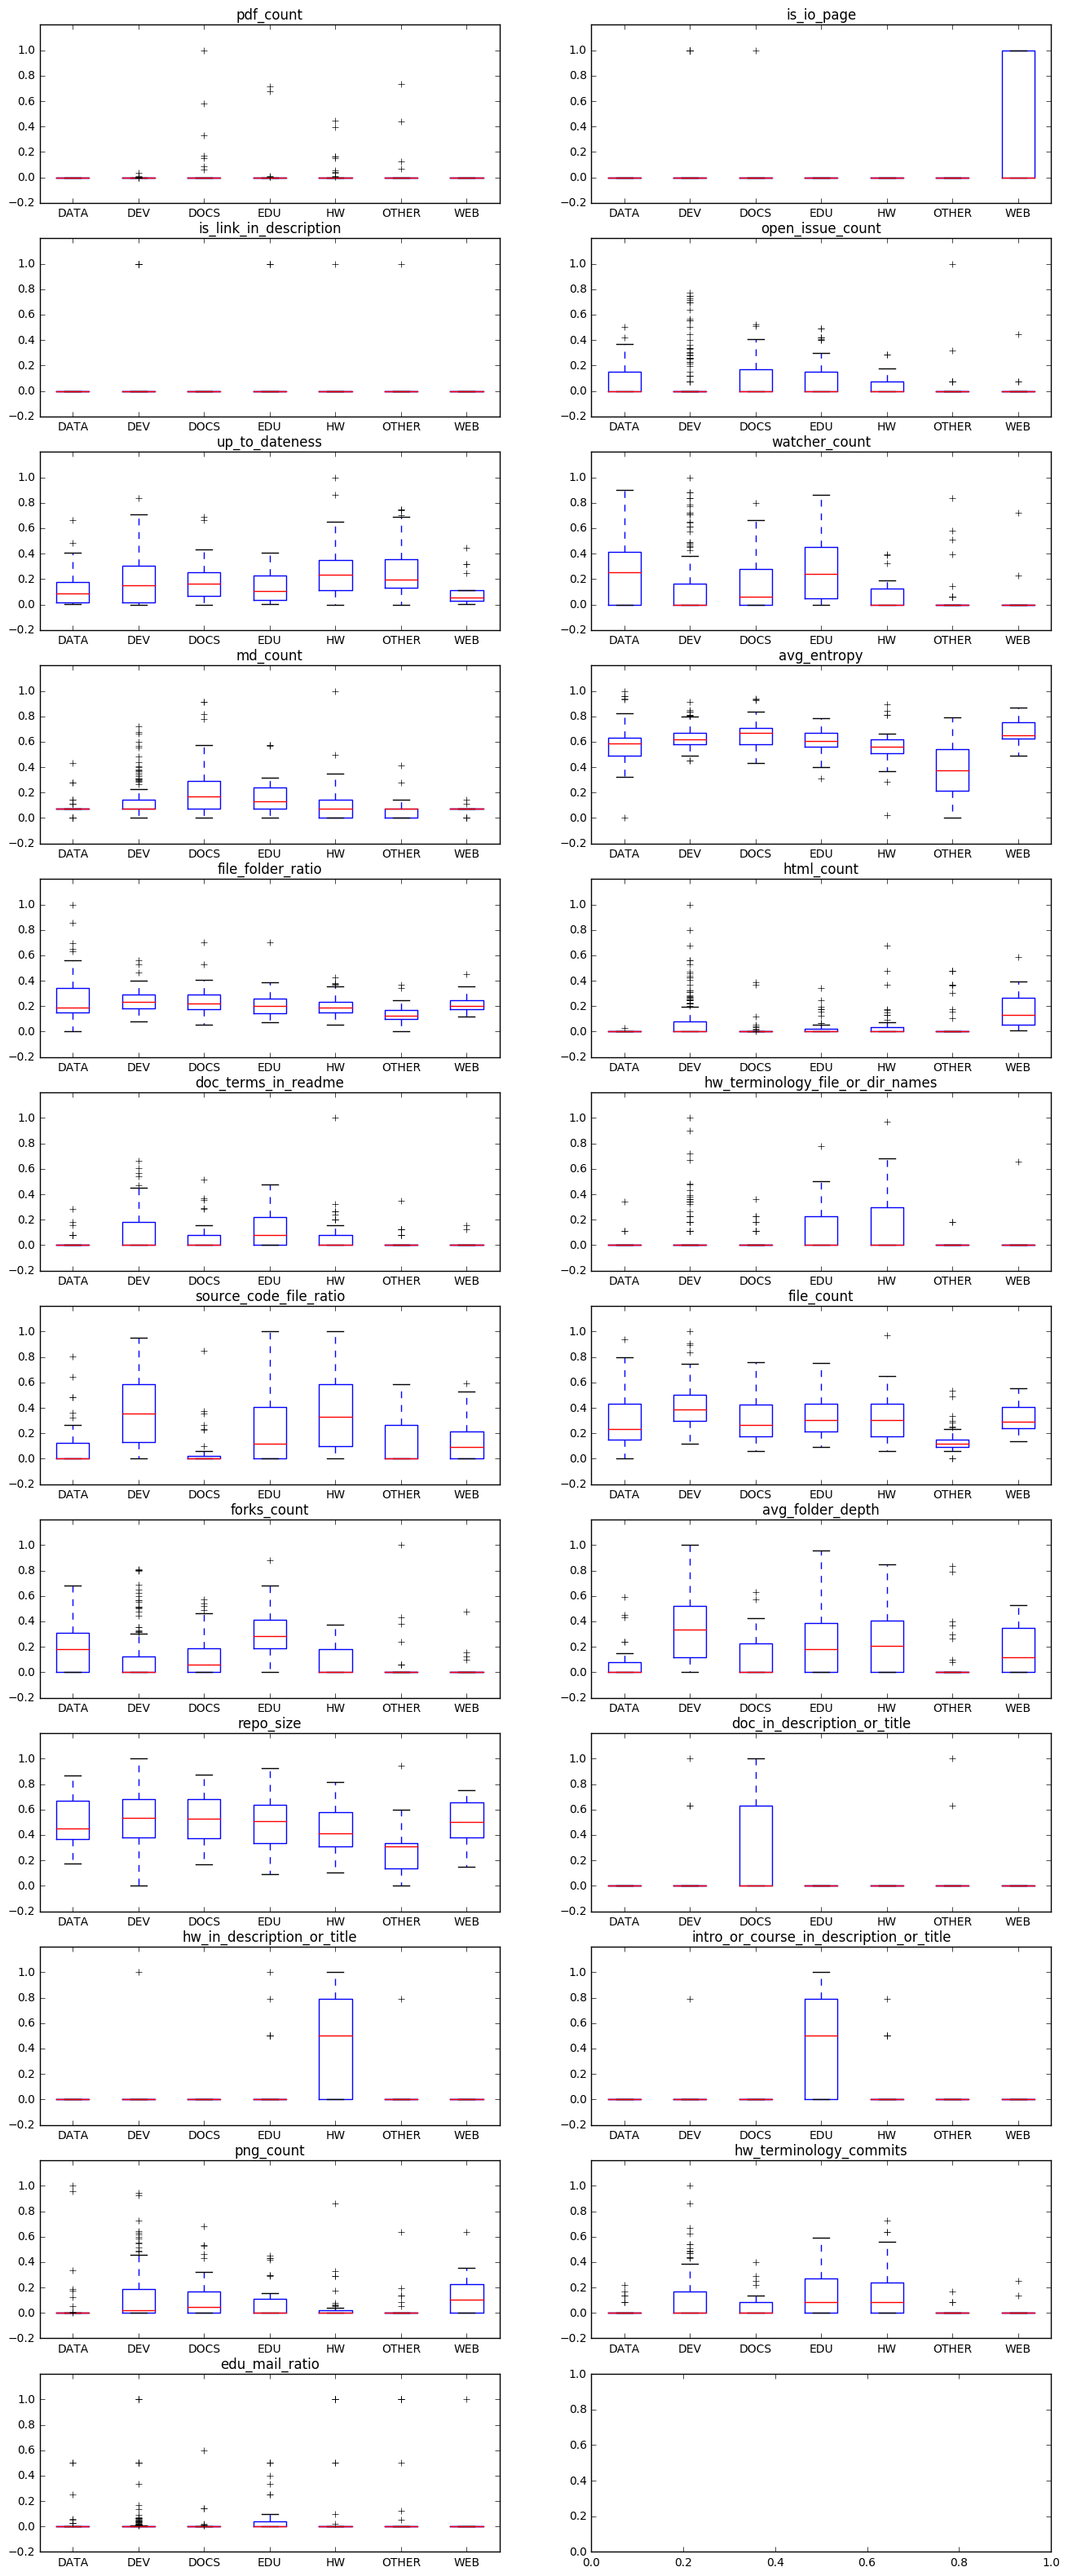

In [14]:
boxplots(X, y)

In [8]:
plot_data = X.copy()
plot_data['y'] = y
#pplot = sbn.pairplot(plot_data, hue='y')
#pplot.savefig('colored_pairplot.png')

In [9]:
#fig = plt.figure(figsize=(16,8))
def bar_plots(data):
    f, axarr = plt.subplots(len(metricCollection), sharex=True, figsize=(16,20))

    index = np.arange(len(data))
    for i, metric in enumerate(metricCollection):
        ax = axarr[i]
        ax.bar(index,
            data[metric],
            0.7, # barwdith
            label=metric
        )
        ax.set_title(metric)

    plt.xticks(index + 0.35, index)
    None

In [10]:
#bar_plots(X)